**WRAPPER METHODS**

Wrapper methods treat feature selection as a search problem. They systematically evaluate different subsets of features and measure their impact on the performance of a specific machine-learning model.

Its types are:- forward slection,backward elimination,recurssive feature elimnation,exhaustive search

**FORWARD SELECTION**

equentialFeatureSelector is used with direction='forward' to iteratively add features that improve model performance.
It trains the model with the selected features and evaluates accuracy.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
svm = SVC(kernel='linear')

# Forward Selection using SequentialFeatureSelector
sfs = SequentialFeatureSelector(svm, n_features_to_select=2, direction='forward')
sfs.fit(X_train, y_train)

# Transform the training and test data
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

# Train the model and predict
svm.fit(X_train_sfs, y_train)
y_pred_sfs = svm.predict(X_test_sfs)

# Print accuracy
accuracy_sfs = accuracy_score(y_test, y_pred_sfs)
print(f"Forward Selection Accuracy: {accuracy_sfs * 100:.2f}%")
print("Selected features:", sfs.get_support())


Forward Selection Accuracy: 100.00%
Selected features: [ True False  True False]


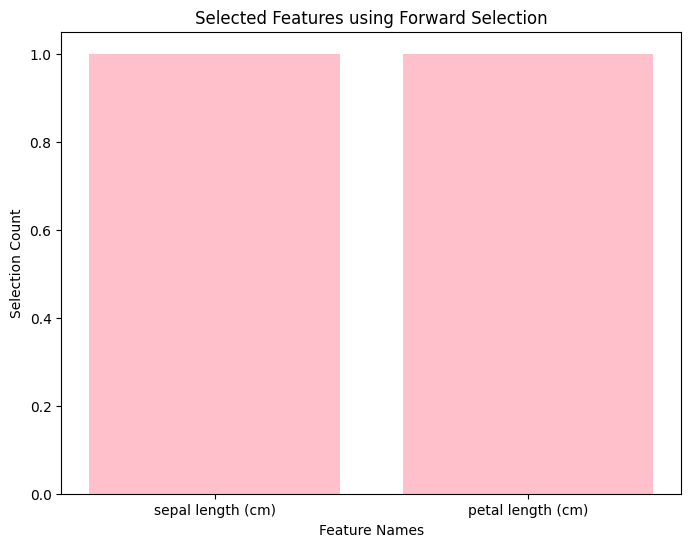

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the indices of selected features
selected_features = np.where(sfs.get_support())[0]

# Plot the selected features
plt.figure(figsize=(8, 6))
plt.bar([iris.feature_names[i] for i in selected_features], height=[1, 1], color='pink')
plt.title('Selected Features using Forward Selection')
plt.xlabel('Feature Names')
plt.ylabel('Selection Count')
plt.show()


**Backward Elimination**

Backward Elimination starts with all the features and removes one feature at a time. At each step, it removes the feature whose removal least affects the model’s performance.

In [ ]:
# Import the necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
svm = SVC(kernel='linear')

# Backward Elimination using SequentialFeatureSelector
sbs = SequentialFeatureSelector(svm, n_features_to_select=2, direction='backward')
sbs.fit(X_train, y_train)  # Fit backward elimination to the training data

# Transform the training and test sets based on selected features
X_train_sbs = sbs.transform(X_train)
X_test_sbs = sbs.transform(X_test)

# Train the classifier with the selected features
svm.fit(X_train_sbs, y_train)

# Predict on the test set
y_pred_sbs = svm.predict(X_test_sbs)

# Evaluate accuracy
accuracy_sbs = accuracy_score(y_test, y_pred_sbs)
print(f"Backward Elimination Accuracy: {accuracy_sbs * 100:.2f}%")
print("Selected features (True means selected):", sbs.get_support())


Backward Elimination Accuracy: 100.00%
Selected features (True means selected): [False False  True  True]


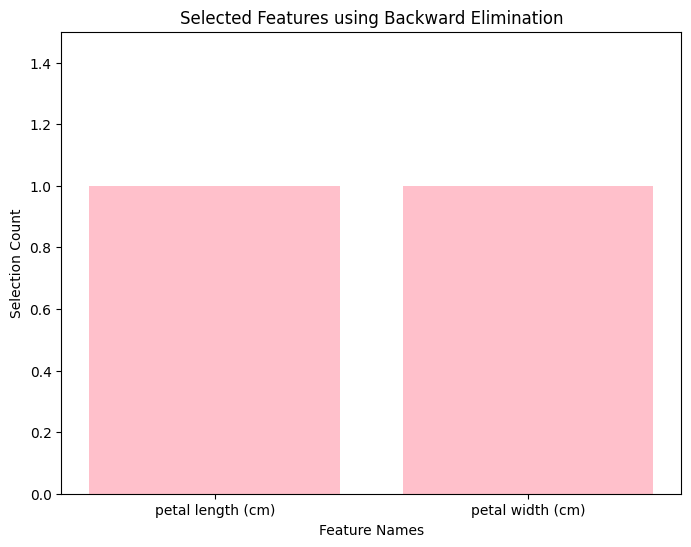

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the indices of selected features
selected_features = np.where(sbs.get_support())[0]

# Plot the selected features
plt.figure(figsize=(8, 6))
plt.bar([iris.feature_names[i] for i in selected_features], height=[1] * len(selected_features), color='pink')
plt.title('Selected Features using Backward Elimination')
plt.xlabel('Feature Names')
plt.ylabel('Selection Count')
plt.ylim(0, 1.5)  # Set limits for the y-axis
plt.show()


**Backward Elimination**

 statistical technique used in regression models to remove the least significant variables step by step.

 Steps in Backward Elimination:

Fit the Model with All Predictors: Start by fitting the model with all possible independent variables.

Look at the p-values: After fitting, examine the p-values of the predictors. The p-value indicates whether a variable significantly affects the dependent variable. The threshold is usually set at 0.05.

Remove the Least Significant Variable: If the variable has a p-value above the threshold (e.g., 0.05), it is considered statistically insignificant, and you remove it.

Refit the Model: After removing the least significant variable, refit the model with the remaining predictors.

Repeat the Process: Continue this process until all remaining variables are statistically significant (p-value < 0.05).

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Independent variables
y = X['petal length (cm)']  # Dependent variable (example)

# We will predict 'petal length (cm)' based on the other features
X = X.drop(['petal length (cm)'], axis=1)

# Add constant (intercept term) for statsmodels OLS
X = sm.add_constant(X)

# Perform Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    num_vars = len(X.columns)
    for i in range(num_vars):
        regressor_OLS = sm.OLS(y, X).fit()
        max_p_value = max(regressor_OLS.pvalues)
        if max_p_value > significance_level:
            max_p_var = regressor_OLS.pvalues.idxmax()  # Identify the variable with the max p-value
            X = X.drop([max_p_var], axis=1)
        else:
            break
    return X

# Apply backward elimination
X_optimal = backward_elimination(X, y)

# Final model with the remaining significant variables
final_model = sm.OLS(y, X_optimal).fit()
print(final_model.summary())


                                 OLS Regression Results                                
Dep. Variable:      petal length (cm)   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              8426.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):                   3.14e-164
Time:                        04:35:25   Log-Likelihood:                         -39.808
No. Observations:                 150   AIC:                                      85.62
Df Residuals:                     147   BIC:                                      94.65
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

**Recursive Feature Elimination (RFE)**

Recursive Feature Elimination (RFE) works by recursively removing the least important features and fitting the model with the remaining features. It ranks the importance of features based on the model’s performance.

Steps:
Train the model with all features.

Rank the features based on their importance (coefficients for linear models).

Remove the least important feature.

Repeat the process until the desired number of features remains.

In [ ]:
from sklearn.feature_selection import RFE

# Initialize RFE with the classifier and the number of features to select
rfe = RFE(estimator=svm, n_features_to_select=2)
rfe.fit(X_train, y_train)  # Fit RFE to the training data

# Transform the training and test sets based on selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the classifier with the selected features
svm.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred_rfe = svm.predict(X_test_rfe)

# Evaluate accuracy
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"RFE Accuracy: {accuracy_rfe * 100:.2f}%")
print("Feature ranking (1 means selected):", rfe.ranking_)


RFE Accuracy: 100.00%
Feature ranking (1 means selected): [3 2 1 1]


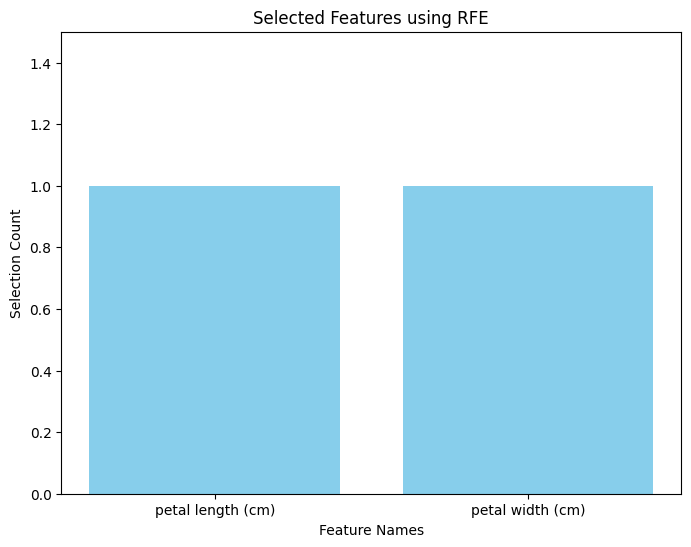

In [ ]:
selected_features_rfe = np.where(rfe.ranking_ == 1)[0]

# Plot the selected features
plt.figure(figsize=(8, 6))
plt.bar([iris.feature_names[i] for i in selected_features_rfe], height=[1] * len(selected_features_rfe), color='skyblue')
plt.title('Selected Features using RFE')
plt.xlabel('Feature Names')
plt.ylabel('Selection Count')
plt.ylim(0, 1.5)  # Set limits for the y-axis
plt.show()

**BACKWARD FEATURE ELIMINATION**

is a machine learning technique that selects the most relevant features for a model by removing the least important features one by one.

is an advanced technique for FS that enables the selection of an optimal number of features by removing those that do not significantly affect the target variable or prediction of outcome




Selected Features (True for selected): [False False  True  True]
Feature Ranking (1 is best): [3 2 1 1]
Accuracy with selected features: 100.00%


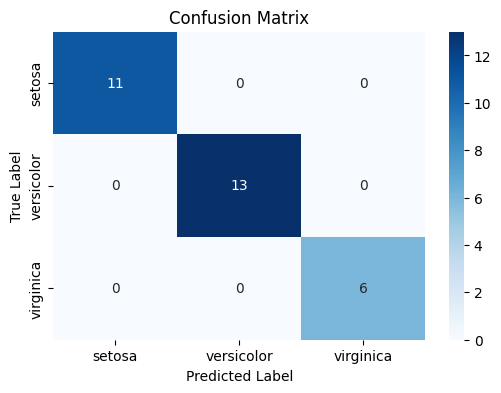

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (species)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the classifier (Logistic Regression)
classifier = LogisticRegression(max_iter=1000)

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=classifier, n_features_to_select=2)  # Select 2 best features
rfe = rfe.fit(X_train, y_train)

# Check the selected features
print("Selected Features (True for selected):", rfe.support_)  # Boolean mask of selected features
print("Feature Ranking (1 is best):", rfe.ranking_)    # Rankings of the features

# Transform the data to keep only the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the classifier with the selected features
classifier.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_rfe)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


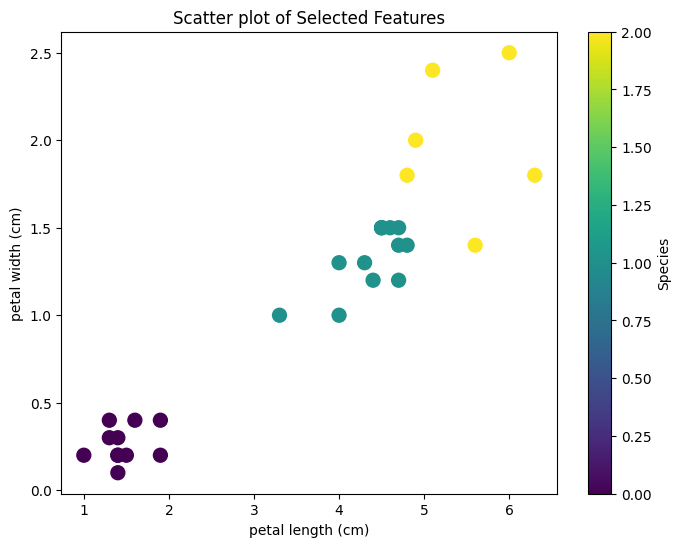

In [ ]:
# Import libraries for visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# -------- Visualization Section --------

# 1. Visualizing Selected Features (2D plot with selected features)
# Scatter plot of two selected features for visualization
selected_feature_indices = np.where(rfe.support_ == True)[0]
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, selected_feature_indices[0]], X_test[:, selected_feature_indices[1]], c=y_test, cmap='viridis', s=100)
plt.title('Scatter plot of Selected Features')
plt.xlabel(iris.feature_names[selected_feature_indices[0]])
plt.ylabel(iris.feature_names[selected_feature_indices[1]])
plt.colorbar(label='Species')
plt.show()





**Embedded Methods**

These methods encompass the benefits of both the wrapper and filter methods by including interactions of features but also maintaining reasonable computational costs. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.




**LASSO Regularization (L1)**

Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e., to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each predictor. From the different types of regularization, Lasso or L1 has the property that can shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Create a logistic regression model with L1 regularization
logistic = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=7)
logistic.fit(X, y)

# Create a SelectFromModel object using the logistic regression model
model = SelectFromModel(logistic, prefit=True)

# Transform the feature matrix using the SelectFromModel object
X_new = model.transform(X)

# Get the indices of the selected features
selected_features = model.get_support(indices=True)  # Get the indices of selected features

# Get the names of the selected features
selected_columns = [iris.feature_names[i] for i in selected_features]

# Print the selected features
print("Selected features:", selected_columns)


Selected features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


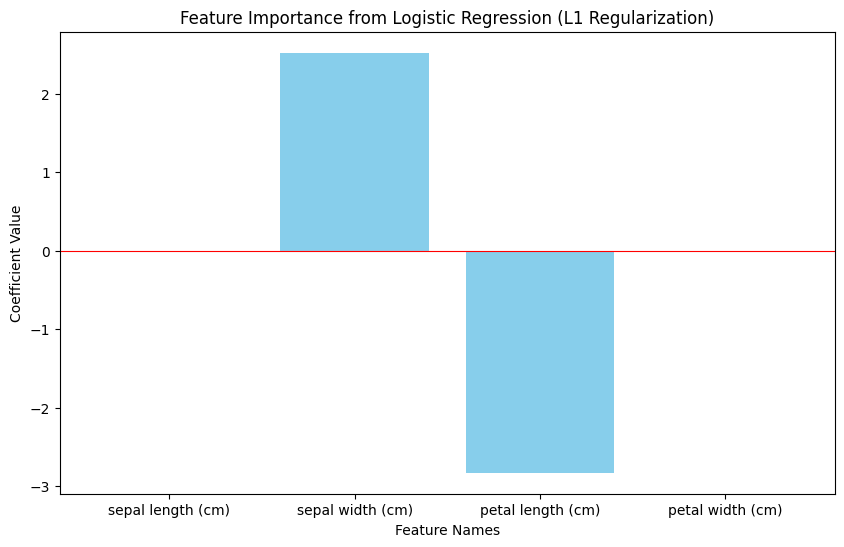

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the ranking of features (1 means selected)
feature_importance = logistic.coef_[0]
feature_names = iris.feature_names
selected_features = model.get_support()  # Get the boolean array of selected features

# Create a list of feature importance for selected features
importance_values = feature_importance[selected_features]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(np.array(feature_names)[selected_features], importance_values, color='skyblue')
plt.title('Feature Importance from Logistic Regression (L1 Regularization)')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='red', linewidth=0.8)  # Optional: Line at y=0 for reference
plt.show()


**Random Forest Importance**

Random Forests is a kind of Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words, a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of the trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.


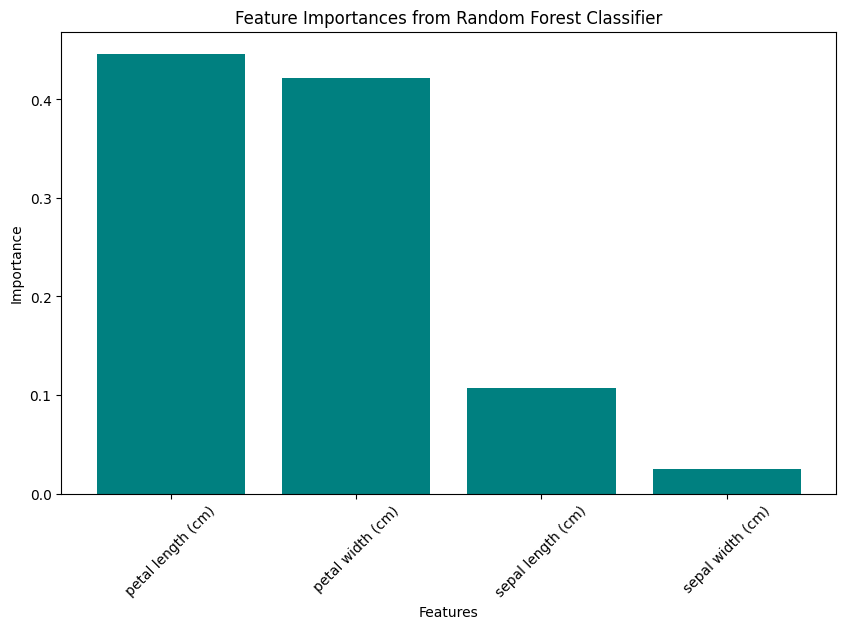

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data
y = iris.target

# Create a Random Forest classifier with your hyperparameters
model = RandomForestClassifier(n_estimators=340, random_state=7)

# Fit the model to the data
model.fit(X, y)

# Get the importance of the resulting features
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_names = iris.feature_names  # Get feature names from the dataset
final_df = pd.DataFrame({'Features': feature_names, 'Importances': importances})

# Sort in ascending order for better visualization
final_df = final_df.sort_values('Importances', ascending=False)

# Plot the feature importances in bars
plt.figure(figsize=(10, 6))
plt.bar(final_df['Features'], final_df['Importances'], color='teal')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)  # Rotate feature names for better visibility
plt.show()
